### Installing required packages & Imports

In [1]:
%pip install pandas
%pip install datasets
%pip install yfinance

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import yfinance as yf
import pandas as pd
import datetime
from datasets import load_dataset

/Users/radu/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/radu/Library/Python/3.9/lib/python/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Loading the dataset from Hugging Face

In [3]:
dataset = load_dataset("NickyNicky/finance-financialmodelingprep-stock-news-sentiments-rss-feed")
dataset.set_format(type='pandas')

df = dataset['train'][:]
df

,symbol,publishedDate,title,image,site,text,url,sentiment,sentimentScore
0,HE,2023-10-04T21:54:28.000Z,"HE REMINDER: Kessler Topaz Meltzer & Check, LL...",/next-assets/images/schema-image-default.png,benzinga,"RADNOR, Pa., Oct. 04, 2023 (GLOBE NEWSWIRE) --...",https://www.benzinga.com/pressreleases/23/10/g...,Negative,-0.6417
1,CRS,2023-10-04T21:40:00.000Z,Carpenter Technology Announces Conference Call...,https://ml.globenewswire.com/Resource/Download...,globenewswire,"PHILADELPHIA, Oct. 04, 2023 (GLOBE NEWSWIRE) -...",https://www.globenewswire.com/news-release/202...,Positive,0.4767
2,BB,2023-10-04T21:34:09.000Z,What's Going On With BlackBerry Stock After Ho...,https://cdn.benzinga.com/files/images/story/20...,benzinga,BlackBerry Ltd (NYSE: BB) shares are trading h...,https://www.benzinga.com/news/23/10/35098537/w...,Positive,0.9895
3,TECK,2023-10-04T21:17:00.000Z,Teck to Release Third Quarter 2023 Results on ...,https://ml.globenewswire.com/Resource/Download...,globenewswire,"VANCOUVER, British Columbia, Oct. 04, 2023 (GL...",https://www.globenewswire.com/news-release/202...,Positive,0.8300
4,AGF,2023-10-04T21:13:38.000Z,AGF Reports September 2023 Assets Under Manage...,/next-assets/images/schema-image-default.png,benzinga,"TORONTO, Oct. 04, 2023 (GLOBE NEWSWIRE) -- AGF...",https://www.benzinga.com/pressreleases/23/10/g...,Positive,0.9768
...,...,...,...,...,...,...,...,...,...
141995,LIFE,2022-08-12T20:05:00.000Z,aTyr Pharma Announces Inducement Grants Under ...,https://ml.globenewswire.com/Resource/Download...,globenewswire,"SAN DIEGO, Aug. 12, 2022 (GLOBE NEWSWIRE) -- a...",https://www.globenewswire.com/news-release/202...,Positive,NaN
141996,LMPX,2022-08-12T20:05:00.000Z,LMP Automotive Holdings Announces Voluntary NA...,https://ml.globenewswire.com/Resource/Download...,globenewswire,"FORT LAUDERDALE, Fla., Aug. 12, 2022 (GLOBE NE...",https://www.globenewswire.com/news-release/202...,Positive,NaN
141997,CVLG,2022-08-12T20:05:00.000Z,Covenant Logistics Group Announces Filing of U...,https://ml.globenewswire.com/Resource/Download...,globenewswire,"CHATTANOOGA, Tenn., Aug. 12, 2022 (GLOBE NEWSW...",https://www.globenewswire.com/news-release/202...,Positive,NaN
141998,GRIN,2022-08-12T20:05:00.000Z,Grindrod Shipping Holdings Ltd. Announces Date...,https://ml.globenewswire.com/Resource/Download...,globenewswire,"SINGAPORE, Aug. 12, 2022 (GLOBE NEWSWIRE) -- G...",https://www.globenewswire.com/news-release/202...,Positive,NaN


### Data cleaning

In [9]:
df.rename(columns={"publishedDate": "publish_time", "text": "body"}, inplace=True)
df['publish_time'] = pd.to_datetime(df['publish_time'], format='ISO8601', utc=True)
df = df.drop(['image', 'site', 'url', 'sentiment', 'sentimentScore'], axis=1)

df

,symbol,publish_time,title,body
0,HE,2023-10-04 21:54:28+00:00,"HE REMINDER: Kessler Topaz Meltzer & Check, LL...","RADNOR, Pa., Oct. 04, 2023 (GLOBE NEWSWIRE) --..."
1,CRS,2023-10-04 21:40:00+00:00,Carpenter Technology Announces Conference Call...,"PHILADELPHIA, Oct. 04, 2023 (GLOBE NEWSWIRE) -..."
2,BB,2023-10-04 21:34:09+00:00,What's Going On With BlackBerry Stock After Ho...,BlackBerry Ltd (NYSE: BB) shares are trading h...
3,TECK,2023-10-04 21:17:00+00:00,Teck to Release Third Quarter 2023 Results on ...,"VANCOUVER, British Columbia, Oct. 04, 2023 (GL..."
4,AGF,2023-10-04 21:13:38+00:00,AGF Reports September 2023 Assets Under Manage...,"TORONTO, Oct. 04, 2023 (GLOBE NEWSWIRE) -- AGF..."
...,...,...,...,...
141995,LIFE,2022-08-12 20:05:00+00:00,aTyr Pharma Announces Inducement Grants Under ...,"SAN DIEGO, Aug. 12, 2022 (GLOBE NEWSWIRE) -- a..."
141996,LMPX,2022-08-12 20:05:00+00:00,LMP Automotive Holdings Announces Voluntary NA...,"FORT LAUDERDALE, Fla., Aug. 12, 2022 (GLOBE NE..."
141997,CVLG,2022-08-12 20:05:00+00:00,Covenant Logistics Group Announces Filing of U...,"CHATTANOOGA, Tenn., Aug. 12, 2022 (GLOBE NEWSW..."
141998,GRIN,2022-08-12 20:05:00+00:00,Grindrod Shipping Holdings Ltd. Announces Date...,"SINGAPORE, Aug. 12, 2022 (GLOBE NEWSWIRE) -- G..."


In [17]:
# check if there are rows with missing publish_time/title/body
print("Missing publish_time: ", len(df[df['publish_time'].isna()]))
print("Missing title: ", len(df[df['title'].isna()]))
print("Missing body: ", len(df[df['body'].isna()]))

Missing publish_time:  0
Missing title:  0
Missing body:  0


### Data analysis & labeling

In [18]:
# count unique tickers
tickers = list(df['symbol'].unique())
print(f"Number of unique tickers: {len(tickers)}")

# minimum and maximum date
min_date = df['publish_time'].min()
max_date = df['publish_time'].max()

print(f"Min date: {min_date}")
print(f"Max date: {max_date}")

Number of unique tickers: 7923
Min date: 2022-08-12 20:05:00+00:00
Max date: 2023-10-04 21:54:28+00:00


In [19]:
# adding the returns of the stocks to the dataframe:

from tqdm import tqdm

tickers = list(df['symbol'].unique())

def returns(date):
  # returns are calculated using the close price from the previous trading day
  # and the open price of the next trading day to include the moment when the
  # news was made public (even if that is during or outside the trading hours)
  
  prev_date = prices[prices.index < date].index.max()
  
  # if there is not enough data to calculate the returns, return NA
  if pd.isnull(prev_date): 
    return pd.NA
  
  prev_date_index = prices.index.get_loc(prev_date.strftime('%Y-%m-%d'))

  if date.strftime('%Y-%m-%d') == prev_date.strftime('%Y-%m-%d'):
    prev_date_index -= 1

  next_date = prices[prices.index > date].index.min()
  
  # if there is not enough data to calculate the returns, return NA
  if pd.isnull(next_date):
    return pd.NA
  
  next_date_index = prices.index.get_loc(next_date.strftime('%Y-%m-%d'))

  if date.strftime('%Y-%m-%d') == next_date.strftime('%Y-%m-%d'):
    next_date_index += 1

  ret = ((prices.iloc[next_date_index]['Open'] - prices.iloc[prev_date_index]['Close']) / prices.iloc[prev_date_index]['Close']) * 100
  
  return ret


for ticker in tqdm(tickers):
    start_date = df[df['symbol'] == ticker]['publish_time'].min() - datetime.timedelta(days=7)
    end_date = df[df['symbol'] == ticker]['publish_time'].max() + datetime.timedelta(days=7)
    prices = yf.download(ticker, start_date, end_date, progress=False)

    # if there is no data available for a stock, remove it from the dataframe
    if len(prices) == 0:
      df = df[df['symbol'] != ticker]
    else:
      prices.index = pd.to_datetime(prices.index, format='%Y-%m-%d', utc=True)
      df.loc[df['symbol'] == ticker, 'returns'] = df[df['symbol'] == ticker]['publish_time'].apply(returns)


df

  0%|          | 0/7923 [00:00<?, ?it/s]

  0%|          | 20/7923 [00:02<13:19,  9.89it/s] 
1 Failed download:
['HPLT']: Exception('%ticker%: No timezone found, symbol may be delisted')
  1%|          | 40/7923 [00:07<15:24,  8.53it/s]
1 Failed download:
['ZYNE']: Exception('%ticker%: No timezone found, symbol may be delisted')
  1%|          | 63/7923 [00:11<21:12,  6.18it/s]
1 Failed download:
['CD']: Exception('%ticker%: No timezone found, symbol may be delisted')
  1%|          | 67/7923 [00:12<30:51,  4.24it/s]
1 Failed download:
['NAV']: Exception('%ticker%: No timezone found, symbol may be delisted')
  1%|          | 77/7923 [00:14<26:20,  4.97it/s]
1 Failed download:
['PACW']: Exception('%ticker%: No timezone found, symbol may be delisted')
  1%|          | 98/7923 [00:17<16:44,  7.79it/s]/var/folders/63/c8pxvvks2_z6m1nd59211gb40000gn/T/ipykernel_21970/1192756036.py:49: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[2.0092954559732976 -

,symbol,publish_time,title,body,returns
0,HE,2023-10-04 21:54:28+00:00,"HE REMINDER: Kessler Topaz Meltzer & Check, LL...","RADNOR, Pa., Oct. 04, 2023 (GLOBE NEWSWIRE) --...",-1.851854
1,CRS,2023-10-04 21:40:00+00:00,Carpenter Technology Announces Conference Call...,"PHILADELPHIA, Oct. 04, 2023 (GLOBE NEWSWIRE) -...",0.558227
2,BB,2023-10-04 21:34:09+00:00,What's Going On With BlackBerry Stock After Ho...,BlackBerry Ltd (NYSE: BB) shares are trading h...,-2.528739
3,TECK,2023-10-04 21:17:00+00:00,Teck to Release Third Quarter 2023 Results on ...,"VANCOUVER, British Columbia, Oct. 04, 2023 (GL...",-2.053593
4,AGF,2023-10-04 21:13:38+00:00,AGF Reports September 2023 Assets Under Manage...,"TORONTO, Oct. 04, 2023 (GLOBE NEWSWIRE) -- AGF...",0.0
...,...,...,...,...,...
141995,LIFE,2022-08-12 20:05:00+00:00,aTyr Pharma Announces Inducement Grants Under ...,"SAN DIEGO, Aug. 12, 2022 (GLOBE NEWSWIRE) -- a...",-4.109592
141996,LMPX,2022-08-12 20:05:00+00:00,LMP Automotive Holdings Announces Voluntary NA...,"FORT LAUDERDALE, Fla., Aug. 12, 2022 (GLOBE NE...",-6.048903
141997,CVLG,2022-08-12 20:05:00+00:00,Covenant Logistics Group Announces Filing of U...,"CHATTANOOGA, Tenn., Aug. 12, 2022 (GLOBE NEWSW...",-2.148605
141998,GRIN,2022-08-12 20:05:00+00:00,Grindrod Shipping Holdings Ltd. Announces Date...,"SINGAPORE, Aug. 12, 2022 (GLOBE NEWSWIRE) -- G...",-3.640046


In [20]:
# get the minimum and maximum returns
print("Min return: ", df['returns'].min())
print("Max return: ", df['returns'].max())

Min return:  -99.81428572109768
Max return:  9899.999772626325


In [22]:
# delete rows with missing returns
print("Missing returns: ", len(df[df['returns'].isna()]))
df = df.dropna(subset=['returns'])

Missing returns:  441


In [24]:
# remove returns > 100% because they are likely to be caused by events such as reverse stock splits
print("Number of returns over 100%: ", len(df[df['returns'] > 100]))
df = df[df['returns'] <= 100]

Number of returns over 100%:  325


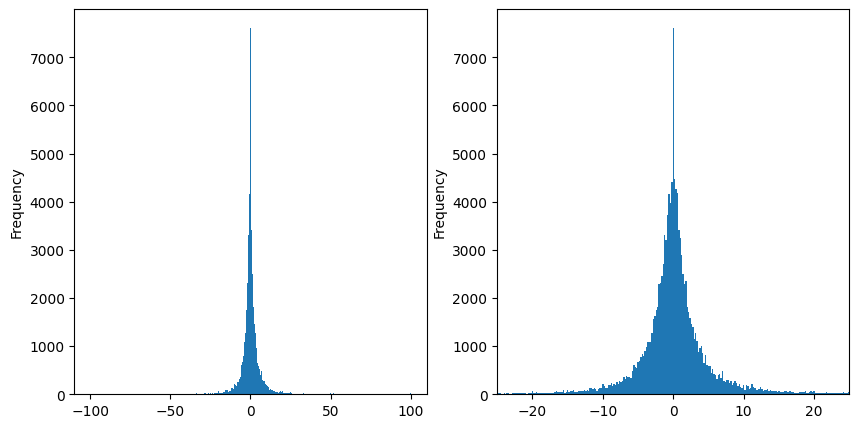

In [25]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
df['returns'].plot.hist(ax=ax[0], bins=1000)
df['returns'].plot.hist(ax=ax[1], bins=1000, xlim=(-25,25))
plt.show()

In [27]:
print("Number of returns under -5%: ", len(df[df['returns'] < -5]))
print("Number of returns over 5%: ", len(df[df['returns'] > 5]))
print("Number of returns between -5 and 5%: ", len(df) - len(df[df['returns'] < -5]) - len(df[df['returns'] > 5]))

Number of returns under -5%:  12780
Number of returns over 5%:  14208
Number of returns between -5 and 5%:  103985


In [29]:
# concatenate titles and bodies of news articles published on the same day for the same stock

df['publish_time'] = pd.to_datetime(df['publish_time'], format='%Y-%m-%d %H:%M:%S', utc=True).dt.date
dataset = df.groupby(['symbol', 'publish_time']).agg({'title': ' '.join, 'body': ' '.join, 'returns': 'mean'}).reset_index()
# dataset = dataset.groupby(['symbol', 'publish_time']).agg({'title': list, 'body': list, 'returns': 'mean'}).reset_index()

dataset

,symbol,publish_time,title,body,returns
0,0001.HK,2022-09-20,"Lifted by Southeast Asia Growth, Insurer FWD S...",Key Takeaways: FWD has switched its focus from...,-0.103733
1,0001.HK,2023-06-07,"Vodafone, Hutchison to announce UK merger as s...",Reuters exclusively reported that Vodafone (VO...,0.103304
2,000660.KS,2023-06-17,How to Get AI Tech Stocks on “Sale”,What if you could buy shares today of hugely s...,-0.756939
3,000881.SZ,2023-06-13,IBA signe un contrat avec son partenaire CGN M...,Ce contrat est la deuxième commande de CGNMT p...,0.374997
4,000931.SZ,2023-01-11,Huawei-backed Saimo Takes IPO Route Towards Dr...,Key Takeaways: Saimo Tech has applied for a Ho...,0.159493
...,...,...,...,...,...
85158,^TNX,2023-03-24,"The Fed gave stocks a reprieve, but the all-cl...",This article first appeared in the Morning Bri...,1.879041
85159,^TNX,2023-03-28,A bank crisis brings an old favorite back for ...,This article first appeared in the Morning Bri...,1.388883
85160,^VIX,2022-09-26,Stock market news live updates: S&P hits new c...,U.S. stocks had yet another losing session Mon...,4.278077
85161,^VIX,2022-09-27,Stock market news live updates: S&P 500 sputte...,"U.S. stocks closed mixed on Tuesday, with the ...",6.943589


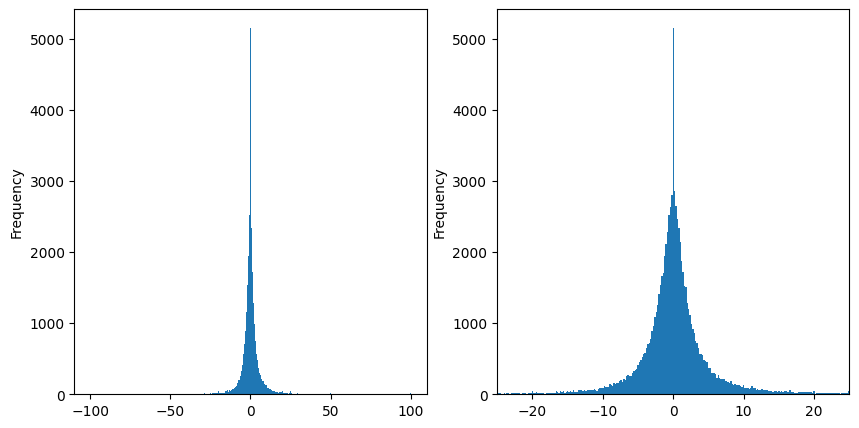

In [30]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
dataset['returns'].plot.hist(ax=ax[0], bins=1000)
dataset['returns'].plot.hist(ax=ax[1], bins=1000, xlim=(-25,25))
plt.show()

In [31]:
print("Number of returns under -5%: ", len(dataset[dataset['returns'] < -5]))
print("Number of returns over 5%: ", len(dataset[dataset['returns'] > 5]))
print("Number of returns between -5 and 5%: ", len(dataset) - len(dataset[dataset['returns'] < -5]) - len(dataset[dataset['returns'] > 5]))

Number of returns under -5%:  8298
Number of returns over 5%:  9146
Number of returns between -5 and 5%:  67719


In [32]:
# add a column to the dataset indicating the trend of the stock price (based on returns)
dataset['trend'] = pd.cut(dataset['returns'], bins=[-100, -5, 5, 100], labels=['decrease', 'stable', 'increase'])

dataset

,symbol,publish_time,title,body,returns,trend
0,0001.HK,2022-09-20,"Lifted by Southeast Asia Growth, Insurer FWD S...",Key Takeaways: FWD has switched its focus from...,-0.103733,stable
1,0001.HK,2023-06-07,"Vodafone, Hutchison to announce UK merger as s...",Reuters exclusively reported that Vodafone (VO...,0.103304,stable
2,000660.KS,2023-06-17,How to Get AI Tech Stocks on “Sale”,What if you could buy shares today of hugely s...,-0.756939,stable
3,000881.SZ,2023-06-13,IBA signe un contrat avec son partenaire CGN M...,Ce contrat est la deuxième commande de CGNMT p...,0.374997,stable
4,000931.SZ,2023-01-11,Huawei-backed Saimo Takes IPO Route Towards Dr...,Key Takeaways: Saimo Tech has applied for a Ho...,0.159493,stable
...,...,...,...,...,...,...
85158,^TNX,2023-03-24,"The Fed gave stocks a reprieve, but the all-cl...",This article first appeared in the Morning Bri...,1.879041,stable
85159,^TNX,2023-03-28,A bank crisis brings an old favorite back for ...,This article first appeared in the Morning Bri...,1.388883,stable
85160,^VIX,2022-09-26,Stock market news live updates: S&P hits new c...,U.S. stocks had yet another losing session Mon...,4.278077,stable
85161,^VIX,2022-09-27,Stock market news live updates: S&P 500 sputte...,"U.S. stocks closed mixed on Tuesday, with the ...",6.943589,increase


In [33]:
# remove 85% of the rows with stable trend to balance the dataset
dataset = dataset.drop(dataset[dataset['trend'] == 'stable'].sample(frac=0.85).index).reset_index(drop=True)

dataset

,symbol,publish_time,title,body,returns,trend
0,000881.SZ,2023-06-13,IBA signe un contrat avec son partenaire CGN M...,Ce contrat est la deuxième commande de CGNMT p...,0.374997,stable
1,002594.SZ,2022-09-27,Aurora Mobile’s Overseas Messaging Cloud Solut...,"SHENZHEN, China, Sept. 27, 2022 (GLOBE NEWSWIR...",0.018314,stable
2,005930.KS,2023-03-14,India plans new security testing for smartphon...,Sources exclusively revealed to Reuters that I...,0.0,stable
3,0700.HK,2022-09-16,Loss-hit Fenbi Tech Seeks IPO Cash After Educa...,Key Takeaways: Fenbi Technology has posted los...,-2.599997,stable
4,0700.HK,2022-11-23,"If JD Tech Is Getting Back on IPO Track, Could...",Key Takeaways: Reports are circulating that Ch...,3.244411,stable
...,...,...,...,...,...,...
27602,^IXIC,2022-10-11,"Stock market news live updates: S&P 500, Nasda...",U.S. stocks fell on Tuesday to cap a back-and-...,-0.996951,stable
27603,^IXIC,2023-02-08,Stock market news live updates: Stocks fall as...,U.S. stocks closed Wednesday lower as another ...,-0.368922,stable
27604,^TNX,2022-10-02,What's happening with the bond market? Experts...,"While equities declined this week, the major f...",-2.418507,stable
27605,^VIX,2022-09-27,Stock market news live updates: S&P 500 sputte...,"U.S. stocks closed mixed on Tuesday, with the ...",6.943589,increase


<Axes: xlabel='trend'>

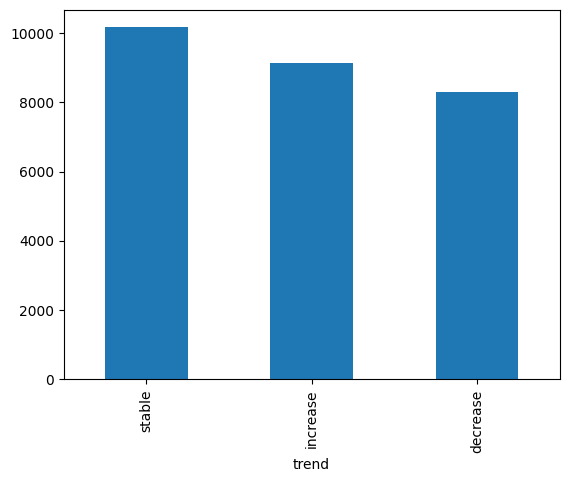

In [34]:
dataset['trend'].value_counts().plot(kind='bar')

In [62]:
dataset.to_csv('dataset2.csv', index=False)